In [1]:
using HDF5, StatsBase, Statistics,PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [3]:
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos"
 "CanalesMalos"
 "LFPSaturados"
 "desde"
 "freq"
 "hasta"

In [7]:
canales=read(arx["CanalesBuenos"])
malos=read(arx["CanalesMalos"])
#lfp=read(arx["dset"]);
csda=read(arx["CSDALindenberg"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])
nmax=size(lfp,3)

2000

In [9]:
dlfp=zeros(64,64,nmax-1)

for j=1:64,k=1:64
    dlfp[j,k,:]=diff(lfp[j,k,:])
end

In [13]:
#symblfp=zeros(64,64,nmax-1);
#=for j=1:64,k=1:64, n=1:(nmax-1)
    symblfp[j,k,n]=sign(dlfp)
end
=#
symblfp=map(sign, dlfp)
slfpA=vec(symblfp[50,28,:])
slfpB=vec(symblfp[60,35,:]);

1999-element Array{Float64,1}:
  1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  0.0
 -1.0
  ⋮
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
  1.0
 -1.0

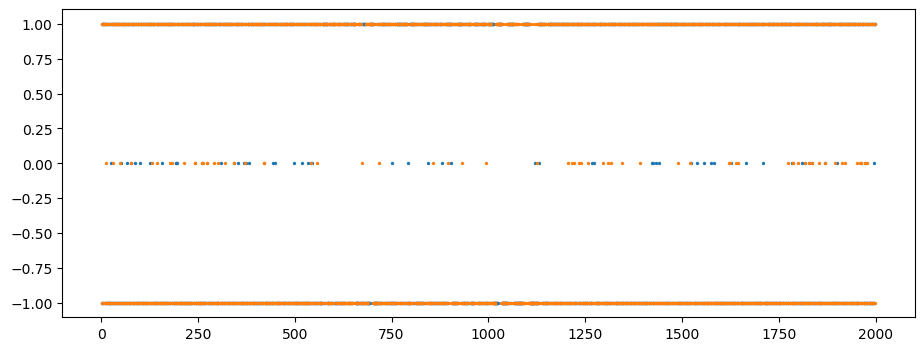

PyObject <matplotlib.collections.PathCollection object at 0x7fdc7841cfd0>

In [18]:
figure(figsize=(11,4))
scatter(1:(nmax-1),slfpA, s=2)
scatter(1:(nmax-1),slfpB, s=2)

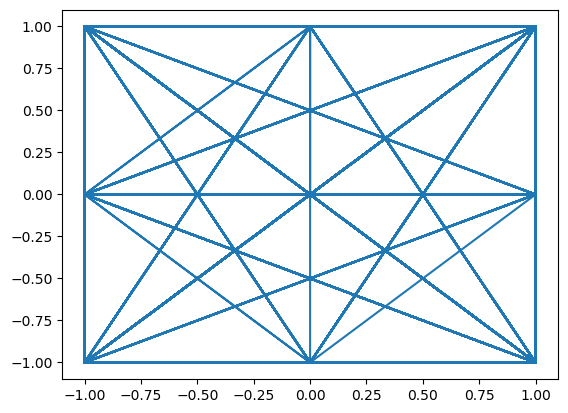

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc7839d410>

In [19]:
plot(slfpA, slfpB)

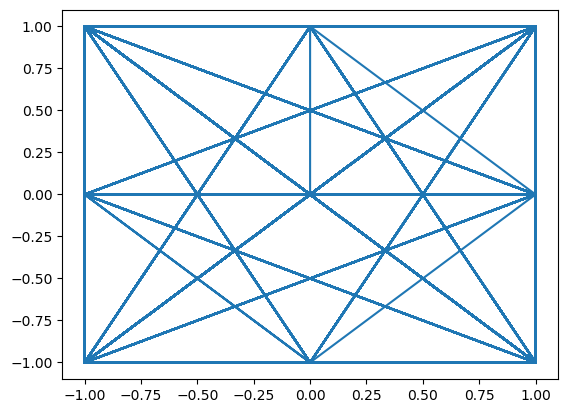

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc78311c10>

In [20]:
slfpA=vec(symblfp[48,30,:])
slfpB=vec(symblfp[63,31,:]);
plot(slfpA, slfpB)

In [22]:
nchans=size(canales,1)

sbuenos=[0]

for j=1:nchans
    q=canales[j,1]
    p=canales[j,2]
    sss=symblfp[q,p,:]
    sbuenos=vcat(sbuenos, sss)
end
sbuenos=sbuenos[2:end];

In [23]:
function dictarrayordenado(dd::Dict)
    llaves=sort(collect(keys(dd)))
    nnll=length(llaves)
    result=zeros(nnll,2)
    for k in 1:nnll
        result[k,1]=llaves[k]
        result[k,2]=dd[llaves[k]]
    end
    #result=result[sortperm(result[:, 1]), :]
    return result
end

dictarrayordenado (generic function with 1 method)

In [24]:
probss=dictarrayordenado(countmap(sbuenos))

3×2 Array{Float64,2}:
 -1.0      1.02128e6
  0.0  69881.0
  1.0      1.01979e6

In [26]:
entropy(probss[:,2]./sum(probss[:,2]))

0.8155730667524039

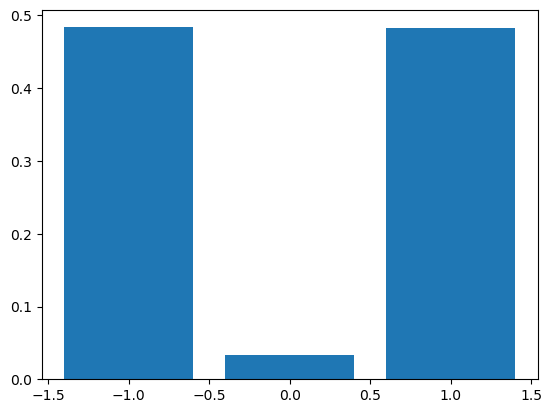

(PyObject <matplotlib.patches.Rectangle object at 0x7fdc78288a90>, PyObject <matplotlib.patches.Rectangle object at 0x7fdc782e9150>, PyObject <matplotlib.patches.Rectangle object at 0x7fdc78288ed0>)

In [27]:
bar(probss[:,1],probss[:,2]./sum(probss[:,2]))

In [34]:
s2=zeros(64,64,nmax-7)
for j=1:64, k=1:64, n=1:(nmax-8)
    s2[j,k,n]=sum(symblfp[j,k,n:n+7])
end

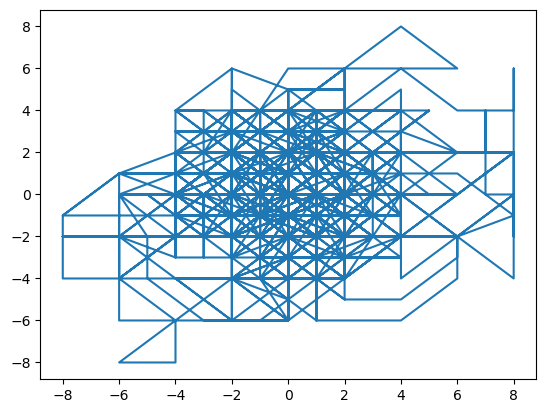

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc77f52290>

In [39]:
slfpA=vec(s2[48,30,:])
slfpB=vec(s2[63,31,:]);
plot(slfpA, slfpB)

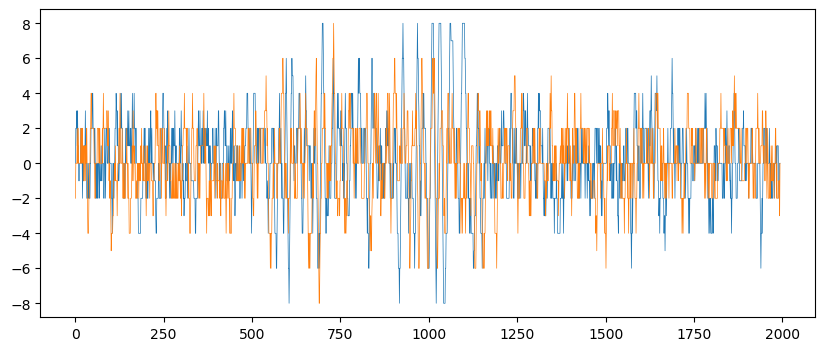

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc78057490>

In [36]:
n2=length(slfpA)
figure(figsize=(10,4))
plot(1:n2, slfpA, lw=0.5)
plot(1:n2,slfpB, lw=0.5)

In [41]:
dA=dictarrayordenado(countmap(slfpA))
dB=dictarrayordenado(countmap(slfpB))
dA[:,2]=dA[:,2]./sum(dA[:,2])
dB[:,2]=dB[:,2]./sum(dB[:,2])

15-element Array{Float64,1}:
 0.0010035122930255895
 0.014049172102358254
 0.002508780732563974
 0.04164576016056196
 0.021073758153537382
 0.15654791771199197
 0.09683893627696939
 0.3065730055193176
 0.0767686904164576
 0.19468138484696437
 0.03311590566984446
 0.04415454089312594
 0.0035122930255895636
 0.007024586051179127
 0.0005017561465127947

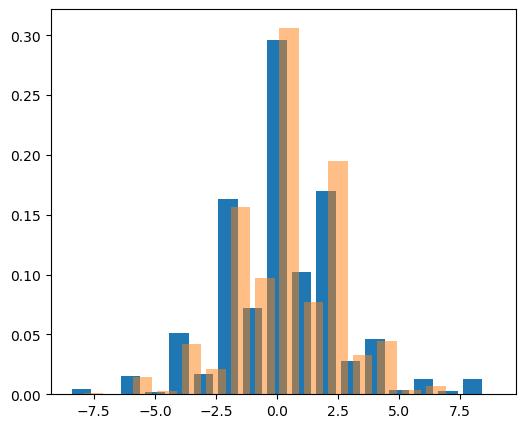

In [44]:
figure(figsize=(6,5))
bar(dA[:,1], dA[:,2])
bar(dB[:,1].+0.5, dB[:,2],alpha=0.5);


In [45]:
entropy(dA[:,2]),entropy(dB[:,2])

(2.0907685761971635, 1.9991827488204408)